# Part II - (GoFord Bike Key Findings Presentation)
## by (Faluta Opeyemi)

## Investigation Overview
- For my key presentation I will focus on service usage difference between customers and subscribers. I will also show how age group population and days of the week comes to play.

- My second key presentation would be about user types by distance and wheather age group affects customers' distance. 

- 3rd key insight provides more information about age groups and how distance and speed affects them.

 


## Dataset Overview

The data set contains:

- An id for each bicycle
- The trip duration in seconds                
- Start time for the trip
- End time for the trip
- The id of the station where the trip started
- The name of the station where the trip started
- The latatitude of the start station
- The longitude of the start station
- The id of the station where the trip ended
- The name of the station where the trip ended
- The latatitude of the end station
- The longitude of the end station
- The users of the GoFord bike service (classified into customers and subscribers)     
- The users' birth year   
- The users' gender (classified into male, female and others)

Feature Engineering:
This was carried out to further derive valuable information from the orignal dataset's variable.
They include: 

- Trip duration in minutes       
- Trip duration in hours       
- From users' birth year, users' age were determined          
- Month the trip took place       
- Days of the week       
- Distance travelled in kilometer       
- Speed in km/hr          
- Geometry points      
- Age group (classified into young adults, middle aged adults, seniors)  


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# importing the clean dataset into a pandas dataframe
bike_geodf = pd.read_csv('clean_201902_fordgobike_tripdata.csv', index_col=0)
bike_geodf.head()

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,bike_share_for_all_trip,duration_mins,duration_hours,member_age,start_time_month,start_time_dow,distance_km,speed_km/hr,geometry,age_group
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,Commercial St at Montgomery St,37.794231,-122.402923,4902,...,No,869.750000,14.495833,34,Feb,Thu,0.36,0.024835,POINT (-122.400811 37.7896254),young_adults
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,37.769305,-122.426826,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,...,No,1030.900000,17.181667,46,Feb,Thu,2.64,0.153652,POINT (-122.4268256 37.7693053),m_aged_adults
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,37.774836,-122.446546,Central Ave at Fell St,37.773311,-122.444293,6638,...,No,608.166667,10.136111,29,Feb,Thu,0.27,0.026637,POINT (-122.44654566049576 37.77483629413345),young_adults
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,37.804562,-122.271738,10th Ave at E 15th St,37.792714,-122.248780,4898,...,Yes,26.416667,0.440278,44,Feb,Thu,2.65,6.018927,POINT (-122.27173805236816 37.8045623549303),m_aged_adults
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,37.770407,-122.391198,Broadway at Kearny,37.798014,-122.405950,5200,...,No,29.883333,0.498056,59,Feb,Thu,2.32,4.658115,POINT (-122.3911984 37.7704074),m_aged_adults


### Key Presentation 1
- Service usage difference between customers and subscribers. 



>> This visualization shows how the users of GoFord Bike service are classified based on user type. 


It shows that subcribers use the service way more than customers by 91% : 9%


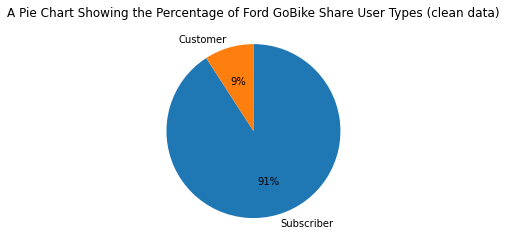

In [3]:
# creating the necessary plot.
data = bike_geodf['user_type'].value_counts() #This returns the count of values in this variable
#since it is a qualitative(categorical) datatype with two categories, a pie chart can be used to represent the data
plt.pie(data, labels = data.index, autopct='%0.0f%%',startangle = 90, counterclock = False)
plt.title('A Pie Chart Showing the Percentage of Ford GoBike Share User Types (clean data)');

print('It shows that subcribers use the service way more than customers by 91% : 9%')

### Key Presentation 2
- user type vs distance: Does age group determine why customers' have a longer distance.
> The charts show that age group cannot determine why customers' have a longer distance. 



## (Visualization 2)
<b>Conclusion:<b>
>> Age group shows that while both user types are populated by young adults (having the highest speed among the age groups as shown in figure 2b), customers still have a higher distance than subscribers. Based on this, age groups can't be used as a determinant.


user_type
Customer      1.768851
Subscriber    1.483183
Name: distance_km, dtype: float64

 The chart shows that customers have a higher amount of subscribers


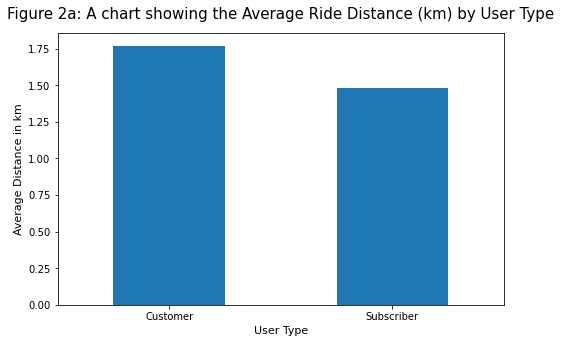

In [4]:
#This figure shows that customers ride a longer distance than subscribers.
#figure 2a: Average Ride Distance (km) by User Type. 
plt.figure(figsize = [8,5])
data = bike_geodf.groupby('user_type')['distance_km'].mean().plot( kind = 'bar')
plt.xticks(rotation =0)
plt.xlabel('User Type', fontsize =11)
plt.ylabel('Average Distance in km', fontsize =11)
plt.title('Figure 2a: A chart showing the Average Ride Distance (km) by User Type',fontsize = 15, y = 1.03);
print(bike_geodf.groupby('user_type')['distance_km'].mean());
print('\n The chart shows that customers have a higher amount of subscribers')

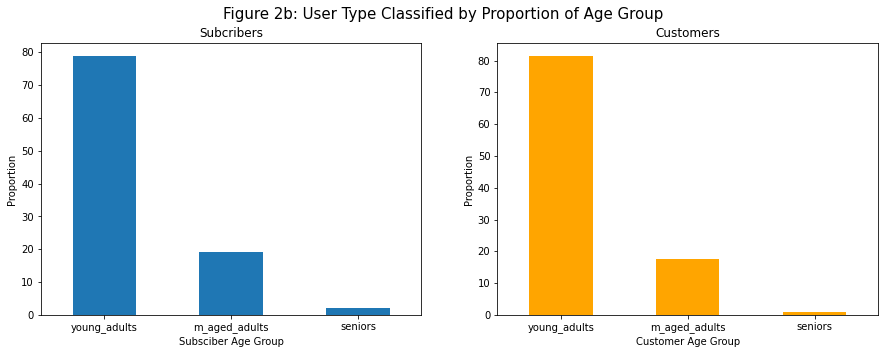

The chart shows that young adults have an higher proportion than other age groups for both user types.
 With subscribers having a higher amount of seniors than customers


In [5]:
#subscriber's population in porpotion
subscriber = bike_geodf[bike_geodf['user_type'] == 'Subscriber']
s_prop = (subscriber['age_group'].value_counts() / subscriber['age_group'].count()) * 100

#customer's population in porpotion
customer = bike_geodf[bike_geodf['user_type'] == 'Customer']
c_prop = (customer['age_group'].value_counts() / customer['age_group'].count()) * 100

#breaking down user type by age group
plt.figure(figsize =[15,5])
plt.suptitle('Figure 2b: User Type Classified by Proportion of Age Group ', fontsize = 15)
plt.subplot(1,2,1)
s_prop.plot(kind='bar')

plt.xlabel('Subsciber Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.title('Subcribers')


plt.subplot(1,2,2)
c_prop.plot(kind='bar', color = 'orange')

plt.xlabel('Customer Age Group')
plt.ylabel('Proportion')
plt.xticks(rotation = 0)
plt.title('Customers')
plt.show()
print('The chart shows that young adults have an higher proportion than other age groups for both user types.\n With subscribers having a higher amount of seniors than customers')

 With figure 2a showing average Ride Distance (km) by User Type.
 Figure 2b shows the user type category being broken down into age groups.
 Figure 2c shows the speed of age groups. 

 Relating figure 2c to figure 2b & 2a above; with young adults having a larger population and the highest average speed,this does not have an effect on customers' average distance travelled.

 Note:Since speed is relative, in this case, to distance. Speed is a good way to measure distance travelled and also to determine if age groups can determine customers' longer distance.


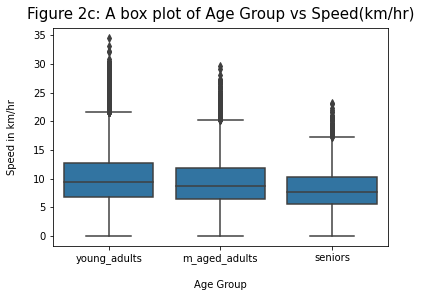

In [6]:
# Figure 2c: Visualizing age group speed. That gives more insight about their distance.
base_color = sns.color_palette()[0]
sns.boxplot(data = bike_geodf, x = 'age_group', y = 'speed_km/hr', color = base_color)
plt.title('Figure 2c: A box plot of Age Group vs Speed(km/hr)', fontsize=15, y=1.015)
plt.xlabel('Age Group', labelpad=16)
plt.ylabel('Speed in km/hr', labelpad=16)
plt.xticks(rotation =0 );
print(" With figure 2a showing average Ride Distance (km) by User Type.\n Figure 2b shows the user type category being broken down into age groups.\n Figure 2c shows the speed of age groups. \n\n Relating figure 2c to figure 2b & 2a above; with young adults having a larger population and the highest average speed,this does not have an effect on customers' average distance travelled.")

print("\n Note:Since speed is relative, in this case, to distance. Speed is a good way to measure distance travelled and also to determine if age groups can determine customers' longer distance.")

### Key Presentation 3
- age group vs (user type & distance): Giving more insights to the effect of speed and distance on age age group




## (Visualization 3)

>- This further buttresses the point that young adults are more likely to travel at a faster speed (and longer distances).
<br> 
    >- Young adults > middle aged adults > seniors.</br> 
>- It is also important to note that distance peaks when users travel at a speed range of (14 - 20) km/hr

Conclusion: The chart clearly shows that young adults are more likely to travel longer distances at a faster speed but it shows no evidence on how this affected customers distance


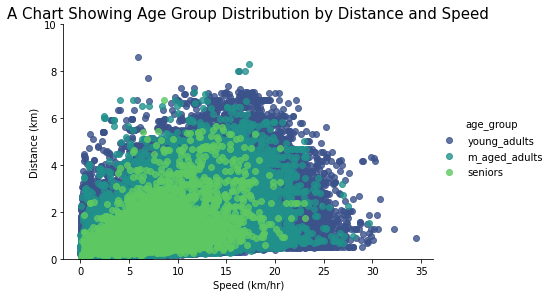

In [7]:
# for categorical variables
g = sns.FacetGrid(data = bike_geodf, hue = 'age_group', height = 4, aspect = 1.5, 
                  palette = 'viridis')
g = g.map(sns.regplot,'speed_km/hr','distance_km', x_jitter = 0.04, fit_reg = False)
g.add_legend()         
plt.xlabel('Speed (km/hr)')
plt.ylabel('Distance (km)')
plt.ylim(0,10) #to zoom in on high concentrationof data points
plt.title('A Chart Showing Age Group Distribution by Distance and Speed',fontsize = 15);

print('Conclusion: The chart clearly shows that young adults are more likely to travel longer distances at a faster speed but it shows no evidence on how this affected customers distance')

In [ ]:
!jupyter nbconvert Part_II_Key_Presentation.ipynb --to slides --ServePostProcessor.port=8911 --post serve --no-input --no-prompt